In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

In [3]:
class LCS:
    
    # LCS 객체를 생성할 때 다음과 같이 초기화
    def __init__(self, x, y):
        self.count = 0
        self.x, self.y = x, y
        self.lx, self.ly = len(x) + 1, len(y) + 1
        self.initDP() # self.dp = np.array([np.NaN] * self.lx * self.ly).reshape(self.lx, self.ly)
        
    # 각 lcs의 계산 횟수를 구한 후에 다시 self.count를 0으로 초기화하는 메서드
    def initCount(self):
        self.count = 0
        
    def initDP(self):
        self.dp = np.array([np.NaN] * self.lx * self.ly).reshape(self.lx, self.ly)
        
    # 계산이 발생할 때 계산 횟수만큼 self.count에 더하는 메서드
    def plusCount(self, count):
        self.count += count
        
    # 각 lcs 알고리즘이 끝날 때마다 구한 계산 횟수를 return하고 초기화하는 메서드
    def popCount(self):
        rv = self.count # return 값
        self.initCount() # self.count 초기화
        return rv
    
    # 비교하는 문자열 쌍이 바뀔 때마다 LCS 객체를 새로 생성하면 비효율적이기 때문에 문자열만 바꾸고 초기화
    def setXY(self, x, y):
        self.initCount()
        self.x, self.y = x, y
        self.lx, self.ly = len(x) + 1, len(y) + 1
        self.initDP()
    
    # rLCS
    def rLCS(self, i, j):
        self.plusCount(1) # 연산 횟수 + 1
        if i == 0 or j == 0:
            return 0
        elif self.x[i - 1] == self.y[j - 1]:
            self.dp[i][j] = self.rLCS(i - 1, j - 1) + 1
            return int(self.dp[i][j])
        else:
            self.dp[i][j] = max(self.rLCS(i - 1, j), self.rLCS(i, j - 1))
            return int(self.dp[i][j])
        
    # rmLCS
    def rmLCS(self, i, j):
        self.plusCount(1) # 연산 횟수 + 1
        if i == 0 or j == 0:
            return 0
        if np.isnan(self.dp[i][j]):
            if self.x[i - 1] == self.y[j - 1]:
                self.dp[i][j] = self.rmLCS(i - 1, j - 1) + 1
            else:
                self.dp[i][j] = max(self.rmLCS(i - 1, j), self.rmLCS(i, j - 1))
        return int(self.dp[i][j])
    
    # dpLCS
    def dpLCS(self):
        for i in range(self.lx):
            self.dp[i][0] = 0
        for j in range(self.ly):
            self.dp[0][j] = 0
        for i in range(1, self.lx):
            for j in range(1, self.ly):
                self.plusCount(1) # 연산 횟수 + 1
                if self.x[i - 1] == self.y[j - 1]:
                    self.dp[i][j] = int(self.dp[i - 1][j - 1]) + 1
                else:
                    self.dp[i][j] = max([self.dp[i - 1][j], self.dp[i][j - 1]])
        return int(self.dp[len(self.x)][len(self.y)])
    
    # pathLCS
    def pathLCS(self):
        stack = []
        i, j = len(self.x), len(self.y)
        if self.dp[i][j] == 0:
            return ""
        while i > 0 and j > 0:
            if self.dp[i][j] == self.dp[i - 1][j]:
                i -= 1
            elif self.dp[i][j] == self.dp[i][j - 1]:
                j -= 1
            else:
                stack.append(self.x[i - 1])
                i, j = i - 1, j - 1
        stack.reverse()
        return "".join(stack)
    
    # 보너스 문제(연속적으로 나타나는 최장 서브스트링)를 위한 dpLCS
    def dpLCSforConsecutiveSubstring(self):
        maxLen, endPos = 0, (0, 0)
        for i in range(self.lx):
            self.dp[i][0] = 0
        for j in range(self.ly):
            self.dp[0][j] = 0
        for i in range(1, self.lx):
            for j in range(1, self.ly):
                if self.x[i - 1] == self.y[j - 1]:
                    self.dp[i][j] = int(self.dp[i - 1][j - 1]) + 1
                    if self.dp[i][j] > maxLen:
                        maxLen = self.dp[i][j]
                        endPos = (i, j)
                else:
                    self.dp[i][j] = 0
        return endPos

    # 연속적으로 나타나는 최장 서브스트링
    def pathLCSforLongestConsecutiveSubstring(self):
        endPos = self.dpLCSforConsecutiveSubstring()
        i, j = endPos
        stack = []
        while self.dp[i][j] > 0:
            stack.append(self.x[i - 1])
            i, j = i - 1, j - 1
        stack.reverse()
        return "".join(stack)

In [4]:
lcsForTest = LCS("", "")

print('LCS 알고리즘이 정상적으로 잘 동작하는지 확인하기 위한 테스트 1')

x1, y1 = 'abcde', 'bde'
print('x1:', x1, '/ y1:', y1, '\n')

lcsForTest.setXY(x1, y1)

# rLCS Test
print('rLCS:', lcsForTest.rLCS(len(x1), len(y1)))
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')
lcsForTest.initDP()

# rmLCS Test
print('rmLCS:', lcsForTest.rmLCS(len(x1), len(y1)))
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')

# dpLCS Test
print('dpLCS:', lcsForTest.dpLCS())
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')

# getConsecutiveSubstring Test
print('consecutiveSubstring:', lcsForTest.pathLCSforLongestConsecutiveSubstring())

LCS 알고리즘이 정상적으로 잘 동작하는지 확인하기 위한 테스트 1
x1: abcde / y1: bde 

rLCS: 3
count: 6
pathLCS: bde 

rmLCS: 3
count: 6
pathLCS: bde 

dpLCS: 3
count: 15
pathLCS: bde 

consecutiveSubstring: de


In [5]:
print('LCS 알고리즘이 정상적으로 잘 동작하는지 확인하기 위한 테스트 2')

x2, y2 = 'abcdefghijklm', 'nopqrstuvwxyz'
print('x2:', x2, '/ y2:', y2, '\n')

lcsForTest.setXY(x2, y2)

# rLCS Test
print('rLCS:', lcsForTest.rLCS(len(x2), len(y2)))
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')
lcsForTest.initDP()

# rmLCS Test
print('rmLCS:', lcsForTest.rmLCS(len(x2), len(y2)))
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')

# dpLCS Test
print('dpLCS:', lcsForTest.dpLCS())
print('count:', lcsForTest.popCount())
print('pathLCS:', lcsForTest.pathLCS(), '\n')

# getConsecutiveSubstring Test
print('consecutiveSubstring:', lcsForTest.pathLCSforLongestConsecutiveSubstring())

LCS 알고리즘이 정상적으로 잘 동작하는지 확인하기 위한 테스트 2
x2: abcdefghijklm / y2: nopqrstuvwxyz 

rLCS: 0
count: 20801199
pathLCS:  

rmLCS: 0
count: 339
pathLCS:  

dpLCS: 0
count: 169
pathLCS:  

consecutiveSubstring: 


In [6]:
xList = ["".join(chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(5, 10)))for _ in range(3)]
yList = ["".join(chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(10, 15)))for _ in range(3)]

for i in range(3):
    x, y = xList[i], yList[i]
    print(f'x{i + 1}: {x} / y{i + 1}: {y}')

x1: uvcujk / y1: tiwdwsmqkbsq
x2: jokvmwoqfd / y2: mzpdopiyij
x3: lwtavbm / y3: vggppxtstgwgdt


In [7]:
lcs = LCS("", "")

xyCounts = {'x':[], 'y':[], 'rLCS':[], 'rmLCS':[], 'dpLCS':[], 'pathLCS':[]}

for i in range(len(xList)):
    for j in range(len(yList)):
        x, y = xList[i], yList[j]

        lcs.setXY(x, y)
        
        xyCounts['x'].append(x)
        xyCounts['y'].append(y)
        
        lcs.rLCS(len(x), len(y))
        xyCounts['rLCS'].append(lcs.popCount())
        lcs.initDP()
        
        lcs.rmLCS(len(x), len(y))
        xyCounts['rmLCS'].append(lcs.popCount())
        
        lcs.dpLCS()
        xyCounts['dpLCS'].append(lcs.popCount())
        
        xyCounts['pathLCS'].append(lcs.pathLCS())

In [8]:
print('입력 문자열에 대한 각 lcs의 연산 횟수')

dfXY = pd.DataFrame(xyCounts)
display(dfXY)

입력 문자열에 대한 각 lcs의 연산 횟수


,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,uvcujk,tiwdwsmqkbsq,29692,128,72,k
1,uvcujk,mzpdopiyij,11440,112,60,j
2,uvcujk,vggppxtstgwgdt,70379,168,84,v
3,jokvmwoqfd,tiwdwsmqkbsq,449108,214,120,mq
4,jokvmwoqfd,mzpdopiyij,252537,190,100,mo
5,jokvmwoqfd,vggppxtstgwgdt,1691216,254,140,vwd
6,lwtavbm,tiwdwsmqkbsq,31994,152,84,wb
7,lwtavbm,mzpdopiyij,38882,140,70,m
8,lwtavbm,vggppxtstgwgdt,142459,188,98,wt


In [9]:
yxCounts = {'x':[], 'y':[], 'rLCS':[], 'rmLCS':[], 'dpLCS':[], 'pathLCS':[]}

for i in range(len(xList)):
    for j in range(len(yList)):
        x, y = xList[i], yList[j]

        lcs.setXY(y, x)
        
        yxCounts['x'].append(y)
        yxCounts['y'].append(x)
        
        lcs.rLCS(len(y), len(x))
        yxCounts['rLCS'].append(lcs.popCount())
        lcs.initDP()
        
        lcs.rmLCS(len(y), len(x))
        yxCounts['rmLCS'].append(lcs.popCount())
        
        lcs.dpLCS()
        yxCounts['dpLCS'].append(lcs.popCount())
        
        yxCounts['pathLCS'].append(lcs.pathLCS())

In [10]:
print('입력 문자열에 대한 각 lcs의 연산 횟수')

dfYX = pd.DataFrame(yxCounts)
display(dfYX)

입력 문자열에 대한 각 lcs의 연산 횟수


,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,tiwdwsmqkbsq,uvcujk,29692,128,72,k
1,mzpdopiyij,uvcujk,11440,112,60,j
2,vggppxtstgwgdt,uvcujk,70379,168,84,v
3,tiwdwsmqkbsq,jokvmwoqfd,449108,214,120,wd
4,mzpdopiyij,jokvmwoqfd,252537,190,100,md
5,vggppxtstgwgdt,jokvmwoqfd,1691216,254,140,vwd
6,tiwdwsmqkbsq,lwtavbm,31994,152,84,tm
7,mzpdopiyij,lwtavbm,38882,140,70,m
8,vggppxtstgwgdt,lwtavbm,142459,188,98,wt


In [11]:
xxCounts = {'x':[], 'y':[], 'rLCS':[], 'rmLCS':[], 'dpLCS':[], 'pathLCS':[]}

for i in range(len(xList)):
    for j in range(len(xList)):
        x1, x2 = xList[i], xList[j]
        lcs.setXY(x1, x2)

        xxCounts['x'].append(x1)
        xxCounts['y'].append(x2)

        lcs.rLCS(len(x1), len(x2))
        xxCounts['rLCS'].append(lcs.popCount())
        lcs.initDP()
        
        lcs.rmLCS(len(x1), len(x2))
        xxCounts['rmLCS'].append(lcs.popCount())
        
        lcs.dpLCS()
        xxCounts['dpLCS'].append(lcs.popCount())

        xxCounts['pathLCS'].append(lcs.pathLCS())

In [12]:
print('입력 문자열에 대한 각 lcs의 연산 횟수')

dfXX = pd.DataFrame(xxCounts)
display(dfXX)

입력 문자열에 대한 각 lcs의 연산 횟수


,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,uvcujk,uvcujk,7,7,36,uvcujk
1,uvcujk,jokvmwoqfd,11408,114,60,jk
2,uvcujk,lwtavbm,2966,84,42,v
3,jokvmwoqfd,uvcujk,11408,114,60,jk
4,jokvmwoqfd,jokvmwoqfd,11,11,100,jokvmwoqfd
5,jokvmwoqfd,lwtavbm,27608,130,70,vm
6,lwtavbm,uvcujk,2966,84,42,v
7,lwtavbm,jokvmwoqfd,27608,130,70,vm
8,lwtavbm,lwtavbm,8,8,49,lwtavbm


In [13]:
yyCounts = {'x':[], 'y':[], 'rLCS':[], 'rmLCS':[], 'dpLCS':[], 'pathLCS':[]}

for i in range(len(yList)):
    for j in range(len(yList)):
        y1, y2 = yList[i], yList[j]
        lcs.setXY(y1, y2)

        yyCounts['x'].append(y1)
        yyCounts['y'].append(y2)

        lcs.rLCS(len(y1), len(y2))
        yyCounts['rLCS'].append(lcs.popCount())
        lcs.initDP()
        
        lcs.rmLCS(len(y1), len(y2))
        yyCounts['rmLCS'].append(lcs.popCount())
        
        lcs.dpLCS()
        yyCounts['dpLCS'].append(lcs.popCount())
        
        yyCounts['pathLCS'].append(lcs.pathLCS())

In [14]:
print('입력 문자열에 대한 각 lcs의 연산 횟수')

dfYY = pd.DataFrame(yyCounts)
display(dfYY)

입력 문자열에 대한 각 lcs의 연산 횟수


,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,tiwdwsmqkbsq,tiwdwsmqkbsq,13,13,144,tiwdwsmqkbsq
1,tiwdwsmqkbsq,mzpdopiyij,953292,237,120,i
2,tiwdwsmqkbsq,vggppxtstgwgdt,13317992,329,168,twd
3,mzpdopiyij,tiwdwsmqkbsq,953292,237,120,m
4,mzpdopiyij,mzpdopiyij,11,11,100,mzpdopiyij
5,mzpdopiyij,vggppxtstgwgdt,2155847,276,140,pd
6,vggppxtstgwgdt,tiwdwsmqkbsq,13317992,329,168,twd
7,vggppxtstgwgdt,mzpdopiyij,2155847,276,140,pp
8,vggppxtstgwgdt,vggppxtstgwgdt,15,15,196,vggppxtstgwgdt


In [15]:
dfs = [dfXY, dfYX, dfXX, dfYY]
df = pd.concat(dfs).reset_index(drop=True)
display(df)

,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,uvcujk,tiwdwsmqkbsq,29692,128,72,k
1,uvcujk,mzpdopiyij,11440,112,60,j
2,uvcujk,vggppxtstgwgdt,70379,168,84,v
3,jokvmwoqfd,tiwdwsmqkbsq,449108,214,120,mq
4,jokvmwoqfd,mzpdopiyij,252537,190,100,mo
5,jokvmwoqfd,vggppxtstgwgdt,1691216,254,140,vwd
6,lwtavbm,tiwdwsmqkbsq,31994,152,84,wb
7,lwtavbm,mzpdopiyij,38882,140,70,m
8,lwtavbm,vggppxtstgwgdt,142459,188,98,wt
9,tiwdwsmqkbsq,uvcujk,29692,128,72,k


###### 추가: 최근에 부상하고 있는 인공지능의 코딩 능력(ChatGPT) 테스트
- 본인의 프로그래밍 결과와 AI 코딩 결과를 비교하거나
- AI 코딩으로만 과제 완료하거나
- 부분적으로 AI 코딩 능력의 도움을 받는 경우

In [18]:
elements = ['x1', 'x2', 'x3', 'y1', 'y2', 'y3']
pairs = [(x, y) for x in elements for y in elements]

print("Total pairs:", len(pairs))
print("Pairs:")
for pair in pairs:
    print(pair, end=' ')

Total pairs: 36
Pairs:
('x1', 'x1') ('x1', 'x2') ('x1', 'x3') ('x1', 'y1') ('x1', 'y2') ('x1', 'y3') ('x2', 'x1') ('x2', 'x2') ('x2', 'x3') ('x2', 'y1') ('x2', 'y2') ('x2', 'y3') ('x3', 'x1') ('x3', 'x2') ('x3', 'x3') ('x3', 'y1') ('x3', 'y2') ('x3', 'y3') ('y1', 'x1') ('y1', 'x2') ('y1', 'x3') ('y1', 'y1') ('y1', 'y2') ('y1', 'y3') ('y2', 'x1') ('y2', 'x2') ('y2', 'x3') ('y2', 'y1') ('y2', 'y2') ('y2', 'y3') ('y3', 'x1') ('y3', 'x2') ('y3', 'x3') ('y3', 'y1') ('y3', 'y2') ('y3', 'y3') 

In [24]:
elements = []

xList = ["".join(chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(5, 10)))for _ in range(3)]
yList = ["".join(chr(random.randint(ord('a'), ord('z'))) for _ in range(random.randint(10, 15)))for _ in range(3)]

for i in range(3):
    x, y = xList[i], yList[i]
    print(f'x{i + 1}: {x} / y{i + 1}: {y}')
    elements.append(x)
    elements.append(y)

x1: xwtcapcwr / y1: niggffrxwlxtrrd
x2: bngrf / y2: kqadtuufvreiddf
x3: ddtcktvqfm / y3: lewoatiimj


In [27]:
pairsOfStrs = [(x, y) for x in elements for y in elements]
print("Total pairs:", len(inStrs))
print(f'pairsOfStrs:\n{inStrs}')

Total pairs: 36
pairsOfStrs:
[('uolcnggwkx', 'uolcnggwkx'), ('uolcnggwkx', 'kvgayvjslvmoaa'), ('uolcnggwkx', 'nqkuf'), ('uolcnggwkx', 'chcwubabqqfzl'), ('uolcnggwkx', 'qcyhg'), ('uolcnggwkx', 'eynclzfdaqn'), ('kvgayvjslvmoaa', 'uolcnggwkx'), ('kvgayvjslvmoaa', 'kvgayvjslvmoaa'), ('kvgayvjslvmoaa', 'nqkuf'), ('kvgayvjslvmoaa', 'chcwubabqqfzl'), ('kvgayvjslvmoaa', 'qcyhg'), ('kvgayvjslvmoaa', 'eynclzfdaqn'), ('nqkuf', 'uolcnggwkx'), ('nqkuf', 'kvgayvjslvmoaa'), ('nqkuf', 'nqkuf'), ('nqkuf', 'chcwubabqqfzl'), ('nqkuf', 'qcyhg'), ('nqkuf', 'eynclzfdaqn'), ('chcwubabqqfzl', 'uolcnggwkx'), ('chcwubabqqfzl', 'kvgayvjslvmoaa'), ('chcwubabqqfzl', 'nqkuf'), ('chcwubabqqfzl', 'chcwubabqqfzl'), ('chcwubabqqfzl', 'qcyhg'), ('chcwubabqqfzl', 'eynclzfdaqn'), ('qcyhg', 'uolcnggwkx'), ('qcyhg', 'kvgayvjslvmoaa'), ('qcyhg', 'nqkuf'), ('qcyhg', 'chcwubabqqfzl'), ('qcyhg', 'qcyhg'), ('qcyhg', 'eynclzfdaqn'), ('eynclzfdaqn', 'uolcnggwkx'), ('eynclzfdaqn', 'kvgayvjslvmoaa'), ('eynclzfdaqn', 'nqkuf'), ('eync

In [28]:
operateCounts = {'x':[], 'y':[], 'rLCS':[], 'rmLCS':[], 'dpLCS':[], 'pathLCS':[]}

for x, y in pairsOfStrs:
    lcs.setXY(x, y)
    
    operateCounts['x'].append(x)
    operateCounts['y'].append(y)
    
    lcs.rLCS(len(x), len(y))
    operateCounts['rLCS'].append(lcs.popCount())
    lcs.initDP()
    
    lcs.rmLCS(len(x), len(y))
    operateCounts['rmLCS'].append(lcs.popCount())
    
    lcs.dpLCS()
    operateCounts['dpLCS'].append(lcs.popCount())
    
    operateCounts['pathLCS'].append(lcs.pathLCS())

In [29]:
print('입력 문자열에 대한 각 lcs의 연산 횟수')

df = pd.DataFrame(operateCounts)
display(df)

입력 문자열에 대한 각 lcs의 연산 횟수


,x,y,rLCS,rmLCS,dpLCS,pathLCS
0,xwtcapcwr,xwtcapcwr,10,10,81,xwtcapcwr
1,xwtcapcwr,niggffrxwlxtrrd,1143156,223,135,xwtr
2,xwtcapcwr,bngrf,2904,84,45,r
3,xwtcapcwr,kqadtuufvreiddf,1729946,250,135,tr
4,xwtcapcwr,ddtcktvqfm,75871,177,90,tc
5,xwtcapcwr,lewoatiimj,85855,177,90,wt
6,niggffrxwlxtrrd,xwtcapcwr,1143156,223,135,xwtr
7,niggffrxwlxtrrd,niggffrxwlxtrrd,16,16,225,niggffrxwlxtrrd
8,niggffrxwlxtrrd,bngrf,11710,132,75,ngf
9,niggffrxwlxtrrd,kqadtuufvreiddf,117062168,388,225,frd


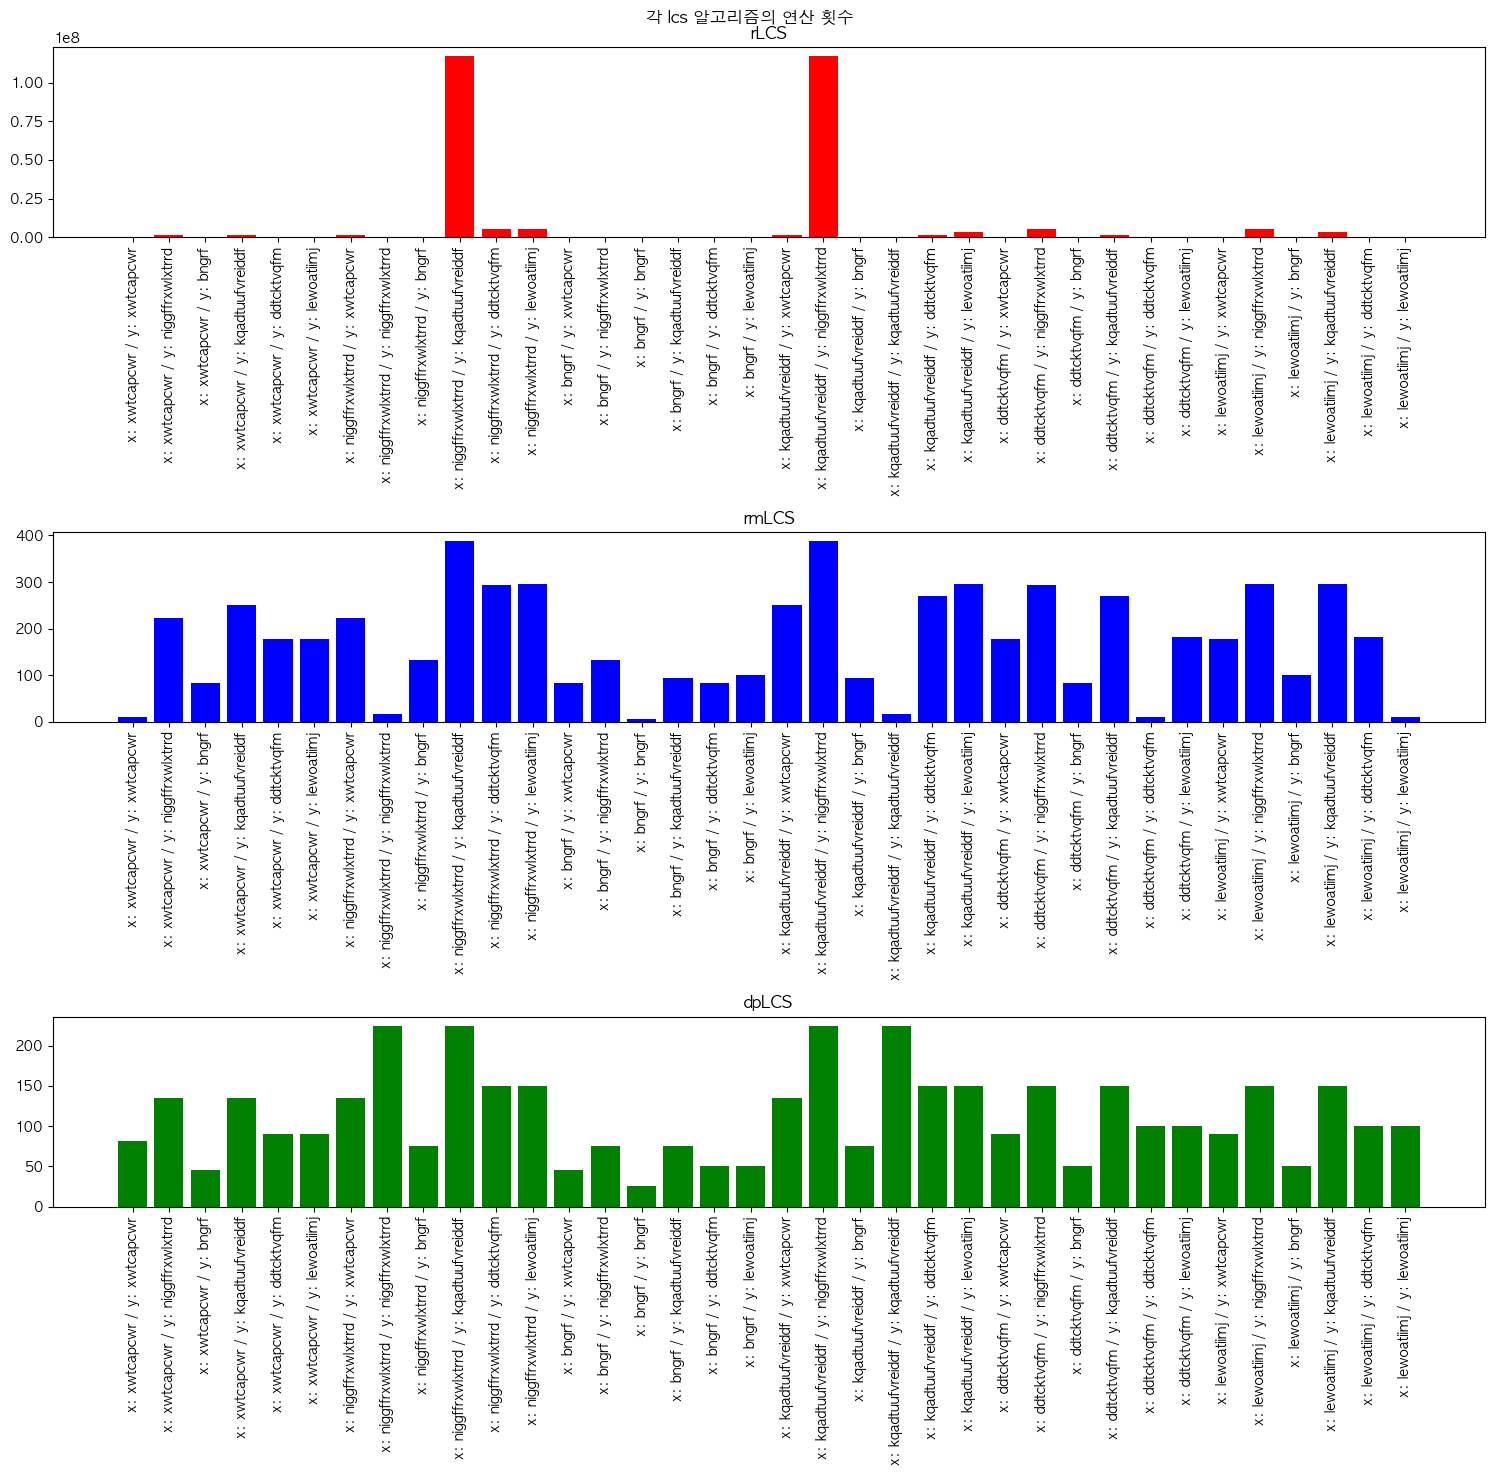

In [30]:
xticklabels = [f'x: {x} / y: {y}' for x, y in pairsOfStrs]

lcsAlgorithms = [['rLCS'], ['rmLCS'], ['dpLCS']]

barColors = [['red'], ['blue'], ['green']]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 15))
fig.suptitle('각 lcs 알고리즘의 연산 횟수')

for i in range(3):
    for j in range(1):
        lcsAlgorithm = lcsAlgorithms[i][j]
        barColor = barColors[i][j]
        axes[i].bar(range(len(pairsOfStrs)), df[lcsAlgorithm], color=barColor)
        axes[i].set_title(lcsAlgorithm)
        axes[i].set_xticks(np.arange(len(pairsOfStrs)))
        axes[i].set_xticklabels(xticklabels, rotation=90)

plt.tight_layout()
plt.show()

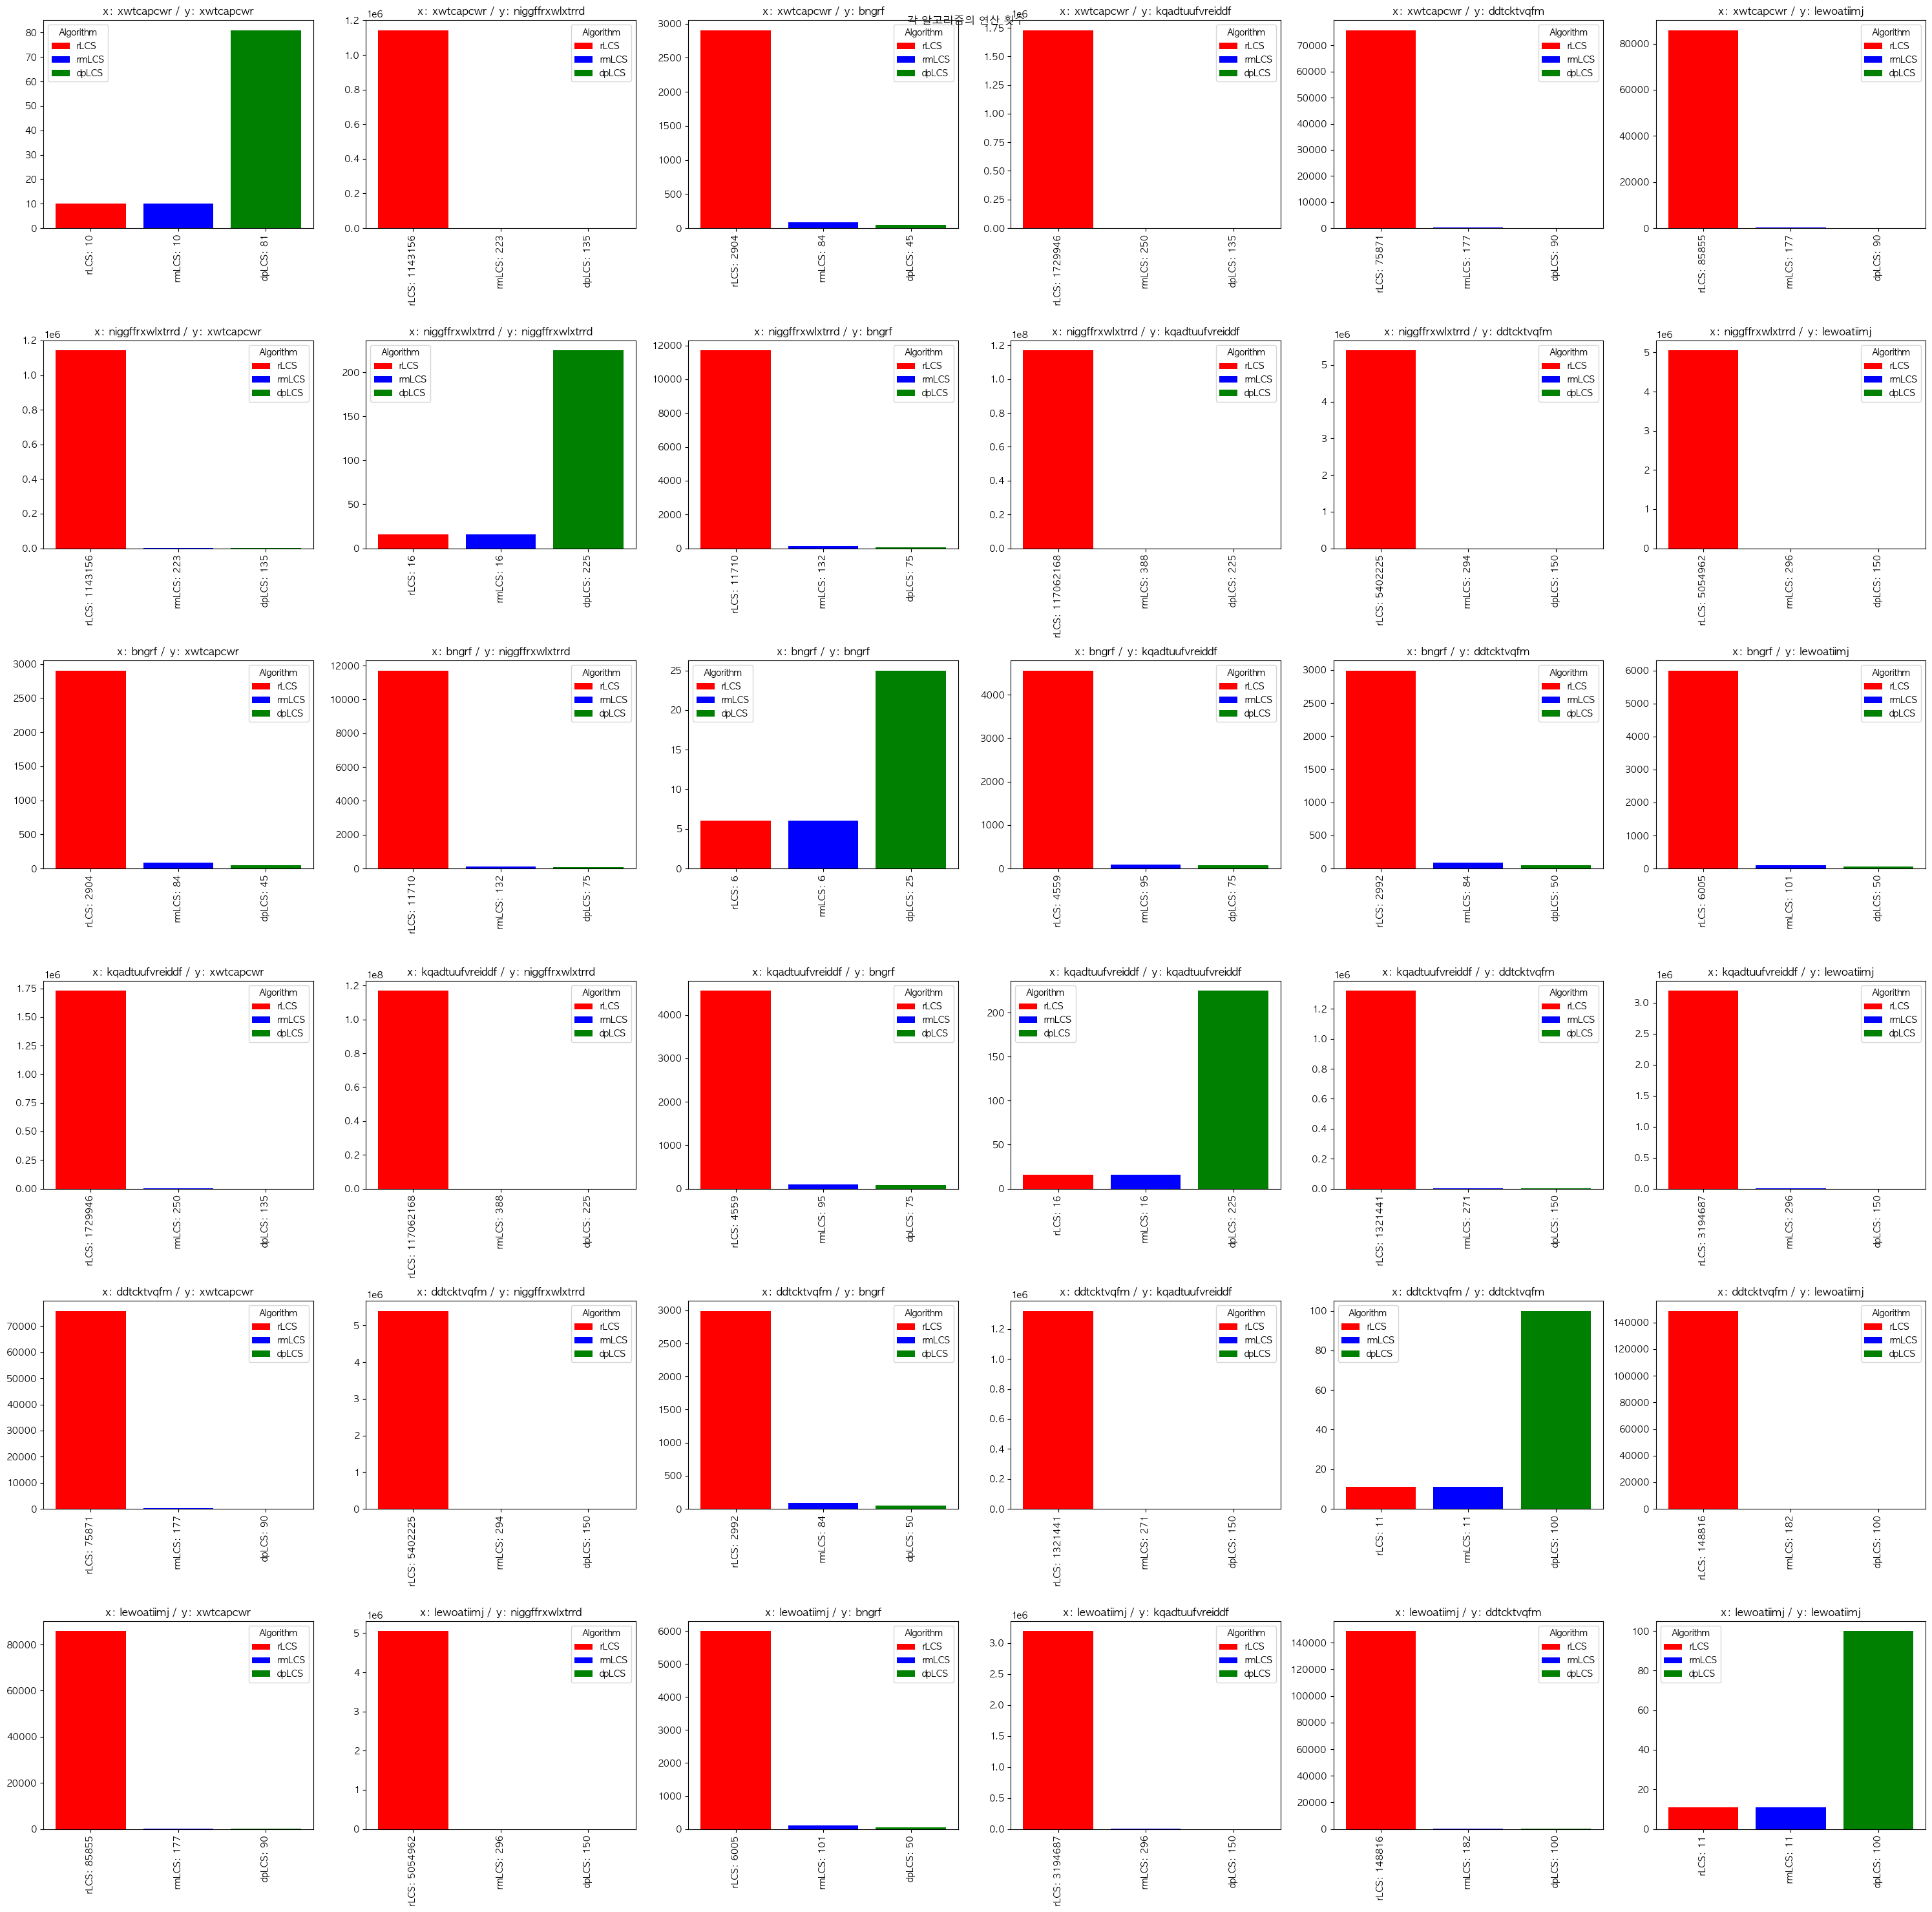

In [31]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 30))
fig.suptitle('각 알고리즘의 연산 횟수')

lcsAlgorithms = ['rLCS', 'rmLCS', 'dpLCS']
barColors = ['red', 'blue', 'green']
axes = axes.flatten()


dataSet = {}

for i in range(len(pairsOfStrs)):
    dataSet[i] = pairsOfStrs[i]

for axIdx, pairOfStrs in enumerate(dataSet.values()):
    x, y = pairOfStrs
    xticklabels = [f'{algorithm}: {val}' for algorithm, val in zip(lcsAlgorithms, df.loc[axIdx, lcsAlgorithms])]

    bars = axes[axIdx].bar(lcsAlgorithms, df.loc[axIdx, lcsAlgorithms], color=barColors)
    axes[axIdx].set_title(f'x: {x} / y: {y}')
    axes[axIdx].set_xlabel('')
    axes[axIdx].set_xticks(np.arange(len(lcsAlgorithms)))
    axes[axIdx].set_xticklabels(xticklabels, rotation=90)
    axes[axIdx].legend(bars, lcsAlgorithms, title='Algorithm')

plt.tight_layout()
plt.show()

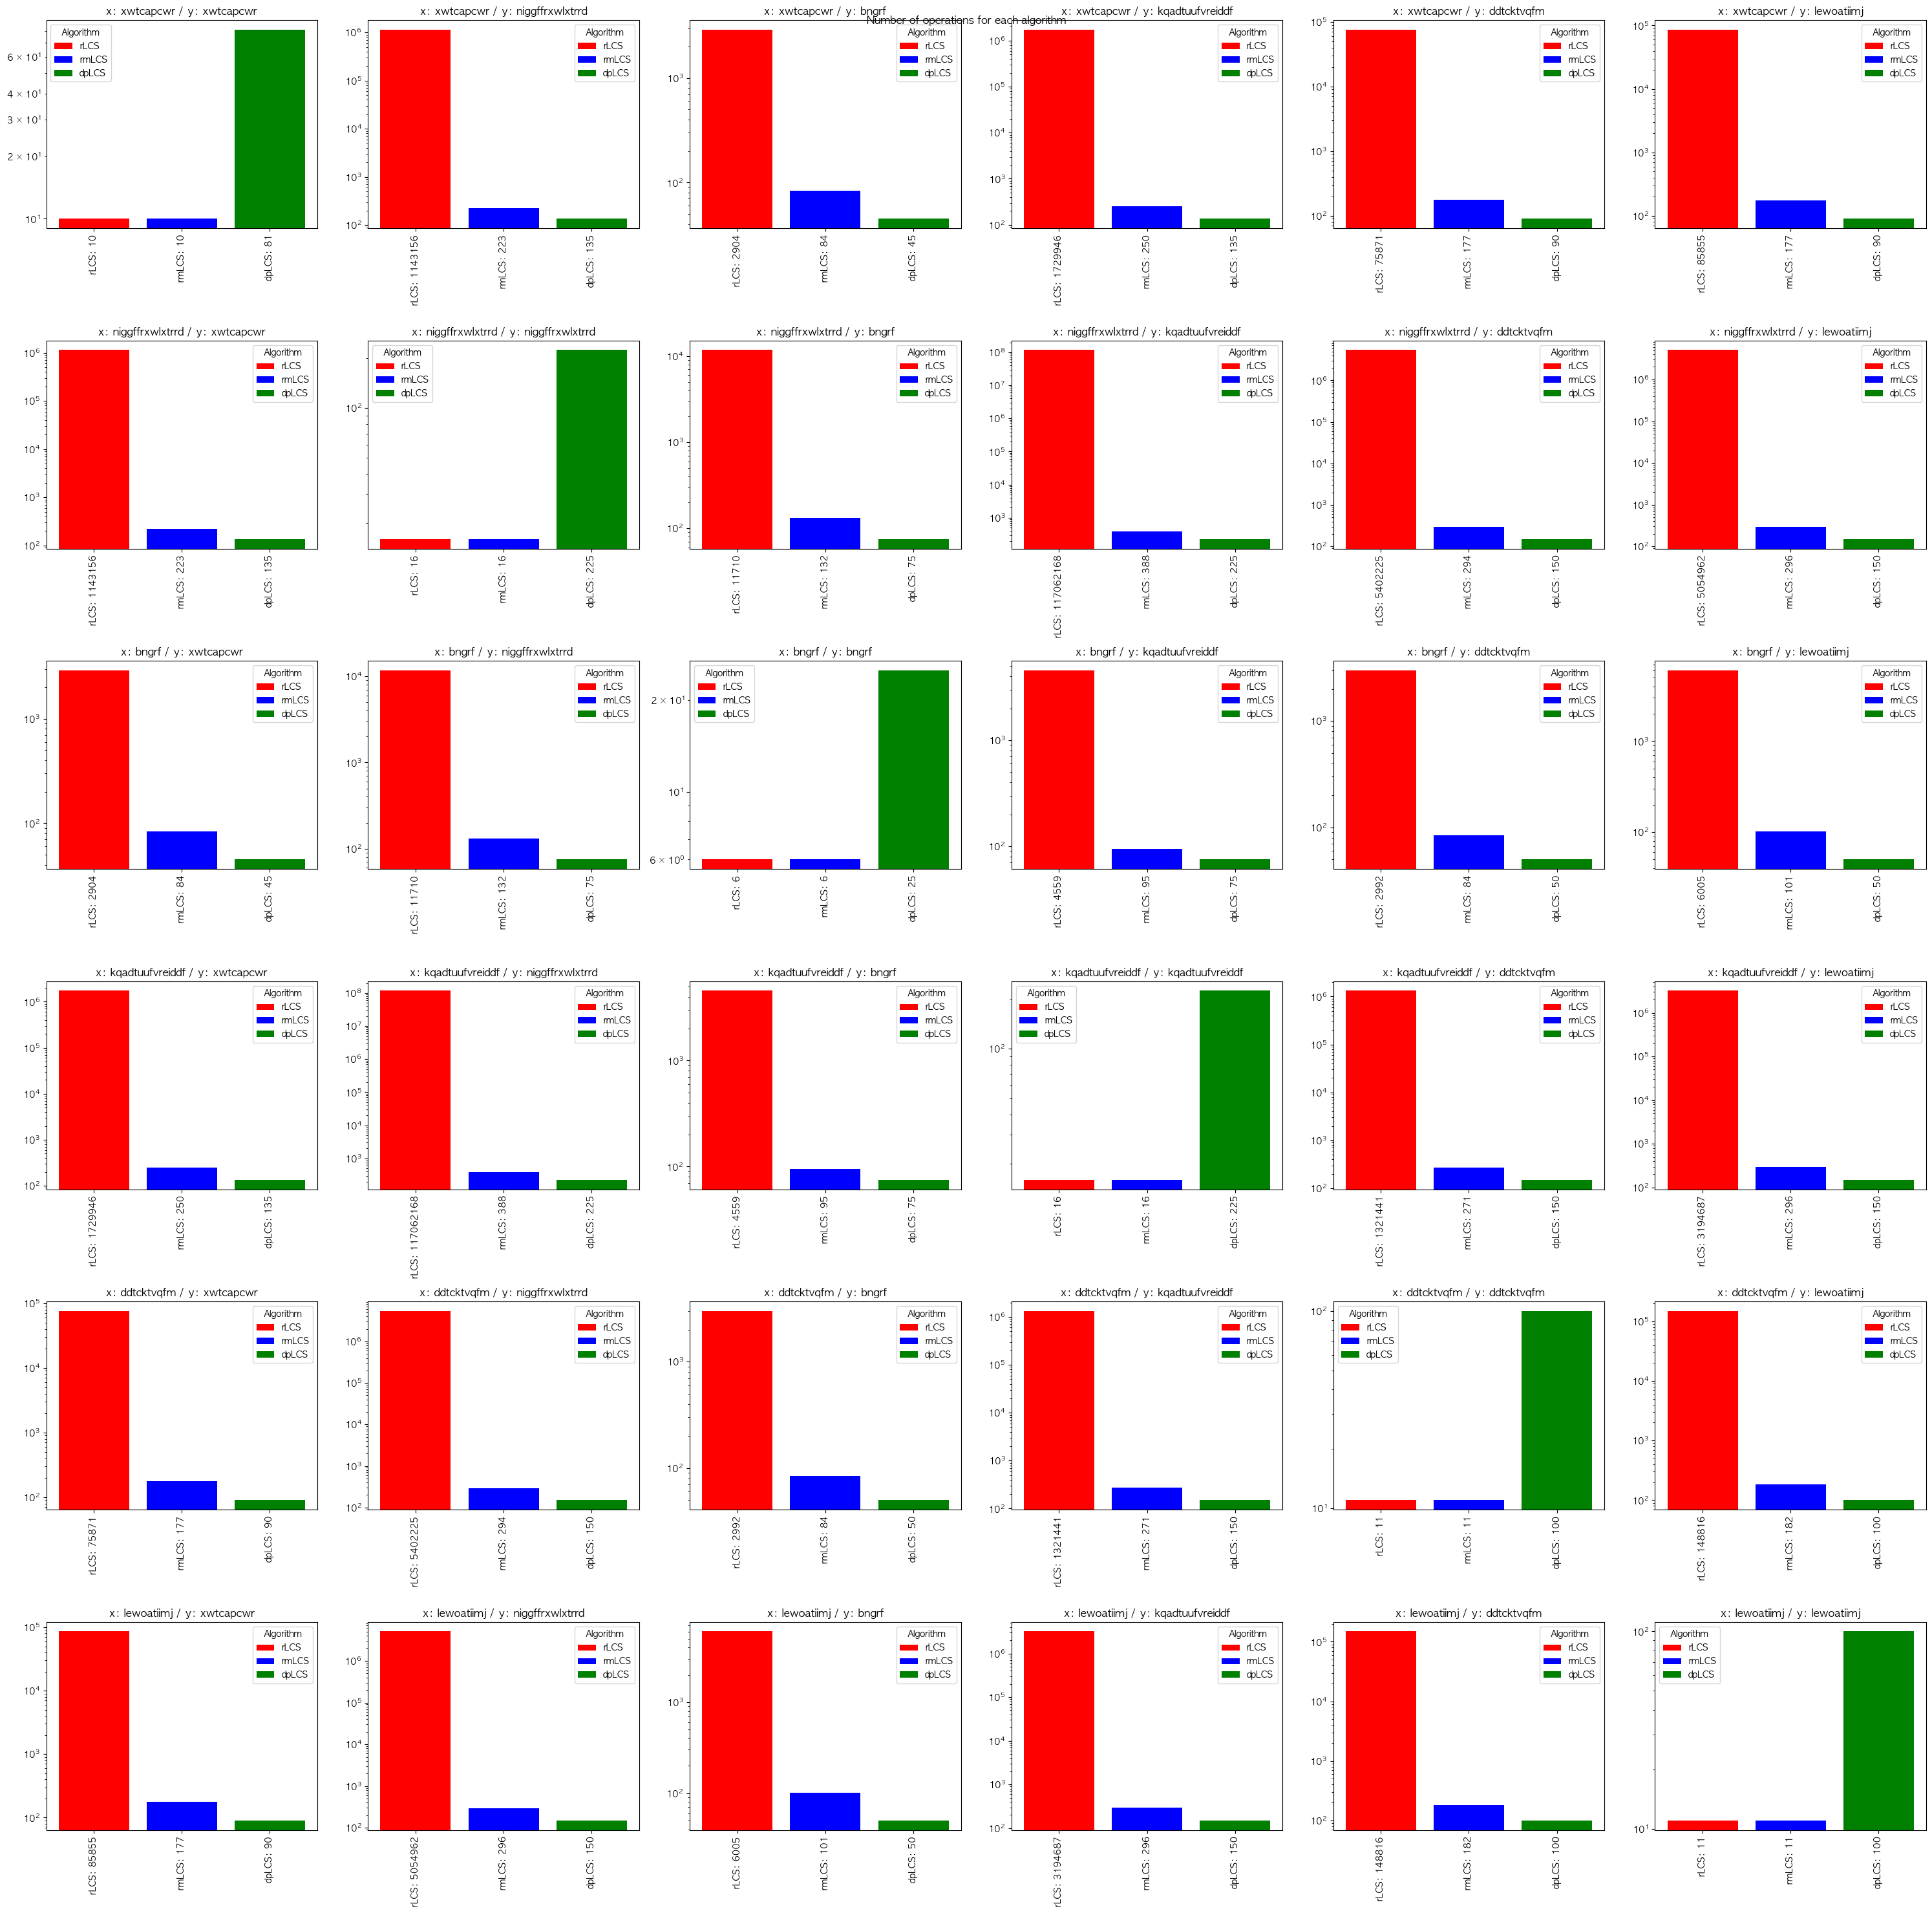

In [32]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(30, 30))
fig.suptitle('Number of operations for each algorithm')

# lcsAlgorithms = ['rLCS', 'rmLCS', 'dpLCS', 'pathLCS']
# barColors = ['red', 'blue', 'green', 'orange']
axes = axes.flatten()

for axIdx, pairOfStrs in enumerate(dataSet.values()):
    x, y = pairOfStrs
    xticklabels = [f'{algorithm}: {val}' for algorithm, val in zip(lcsAlgorithms, df.loc[axIdx, lcsAlgorithms])]

    bars = axes[axIdx].bar(lcsAlgorithms, df.loc[axIdx, lcsAlgorithms], color=barColors)
    axes[axIdx].set_title(f'x: {x} / y: {y}')
    axes[axIdx].set_xlabel('')
    axes[axIdx].set_xticks(np.arange(len(lcsAlgorithms)))
    axes[axIdx].set_xticklabels(xticklabels, rotation=90)
    axes[axIdx].legend(bars, lcsAlgorithms, title='Algorithm')

    axes[axIdx].set_yscale('log')

plt.tight_layout()
plt.show()

In [33]:
additionalCounts = {'x':[], 'y':[], 'longestConsecutiveSubstring':[]}

for x, y in pairsOfStrs:
    lcs.setXY(x, y)
    
    additionalCounts['x'].append(x)
    additionalCounts['y'].append(y)
    
    additionalCounts['longestConsecutiveSubstring'].append(lcs.pathLCSforLongestConsecutiveSubstring())

additionalDF = pd.DataFrame(additionalCounts)
display(additionalDF)

,x,y,longestConsecutiveSubstring
0,xwtcapcwr,xwtcapcwr,xwtcapcwr
1,xwtcapcwr,niggffrxwlxtrrd,xw
2,xwtcapcwr,bngrf,r
3,xwtcapcwr,kqadtuufvreiddf,t
4,xwtcapcwr,ddtcktvqfm,tc
5,xwtcapcwr,lewoatiimj,w
6,niggffrxwlxtrrd,xwtcapcwr,xw
7,niggffrxwlxtrrd,niggffrxwlxtrrd,niggffrxwlxtrrd
8,niggffrxwlxtrrd,bngrf,n
9,niggffrxwlxtrrd,kqadtuufvreiddf,i
